## Load libraries

In [81]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# required sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Loading the Datasets

In [9]:
url_test = "https://raw.githubusercontent.com/beyzaozen/Ferrero_BusinessCase/main/california_housing_test.csv"
url_train = "https://raw.githubusercontent.com/beyzaozen/Ferrero_BusinessCase/main/california_housing_train.csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

### 1. Read 'california_housing_train.csv' and print the first 15 rows

In [10]:
df_train.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [8]:
df_test.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


### 2. Check the following characteristics of the dataset:
- Number of rows and columns
- Data type
- Print the names of columns

In [19]:
print(f'Train set row~columns : {df_train.shape[0]}~{df_train.shape[1]}')
print(f'Test set row~columns : {df_test.shape[0]}~{df_test.shape[1]}')

print("\nData types for training data:")
print(df_train.dtypes)

print("\nData types for test data:")
print(df_test.dtypes)

Train set row~columns : 17000~9
Test set row~columns : 3000~9

Data types for training data:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

Data types for test data:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


### 3. Does the dataset contain any null values

In [24]:
# df_train.isna().sum()

def get_missing_columns(df, top_N = 20):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing.head(top_N)

print("Null values for training set:")
print(get_missing_columns(df_train))
print("\nNull values for test set:")
print(get_missing_columns(df_test))

Null values for training set
                    Total  Percent
longitude               0      0.0
latitude                0      0.0
housing_median_age      0      0.0
total_rooms             0      0.0
total_bedrooms          0      0.0
population              0      0.0
households              0      0.0
median_income           0      0.0
median_house_value      0      0.0

Null values for test set
                    Total  Percent
longitude               0      0.0
latitude                0      0.0
housing_median_age      0      0.0
total_rooms             0      0.0
total_bedrooms          0      0.0
population              0      0.0
households              0      0.0
median_income           0      0.0
median_house_value      0      0.0


### 4. Create a dataframe with the total number of rooms (aggregated) and total number of bedrooms (aggregated) if the housing median age is less than 25

In [34]:
exampe_df = df_train[df_train["housing_median_age"]<25]
exampe_df.groupby(["total_rooms", "total_bedrooms"]).agg(['mean', 'min',"max"]).head()

longitude                 latitude                \
                                mean     min     max     mean    min    max   
total_rooms total_bedrooms                                                    
2.0         2.0              -117.79 -117.79 -117.79    35.21  35.21  35.21   
18.0        3.0              -117.76 -117.76 -117.76    35.22  35.22  35.22   
            6.0              -118.44 -118.44 -118.44    34.04  34.04  34.04   
20.0        5.0              -117.86 -117.86 -117.86    33.67  33.67  33.67   
30.0        3.0              -117.27 -117.27 -117.27    34.17  34.17  34.17   

                           housing_median_age             population  ...  \
                                         mean   min   max       mean  ...   
total_rooms total_bedrooms                                            ...   
2.0         2.0                           4.0   4.0   4.0        6.0  ...   
18.0        3.0                           4.0   4.0   4.0        8.0  ...   
            6.0                          16.0  16.0  16.0        3.0  ...   
20.0        5.0                          16.0  16.0  16.0       15.0  ...   
30.0        3.0                          16.0  16.0  16.0       49.0  ...   

                                 households           median_income         \
                             max       mean  min  max          mean    min   
total_rooms total_bedrooms                                                   
2.0         2.0              6.0        2.0  2.0  2.0         2.375  2.375   
18.0        3.0              8.0        6.0  6.0  6.0         1.625  1.625   
            6.0              3.0        4.0  4.0  4.0         0.536  0.536   
20.0        5.0             15.0        5.0  5.0  5.0         3.875  3.875   
30.0        3.0             49.0        8.0  8.0  8.0         4.625  4.625   

                                  median_house_value                      
                              max               mean       min       max  
total_rooms total_bedrooms                                                
2.0         2.0             2.375           137500.0  137500.0  137500.0  
18.0        3.0             1.625           275000.0  275000.0  275000.0  
            6.0             0.536           350000.0  350000.0  350000.0  
20.0        5.0             3.875           450000.0  450000.0  450000.0  
30.0        3.0             4.625           250000.0  250000.0  250000.0  

[5 rows x 21 columns]

### 5. Display a scatterplot that compares median income with median house value

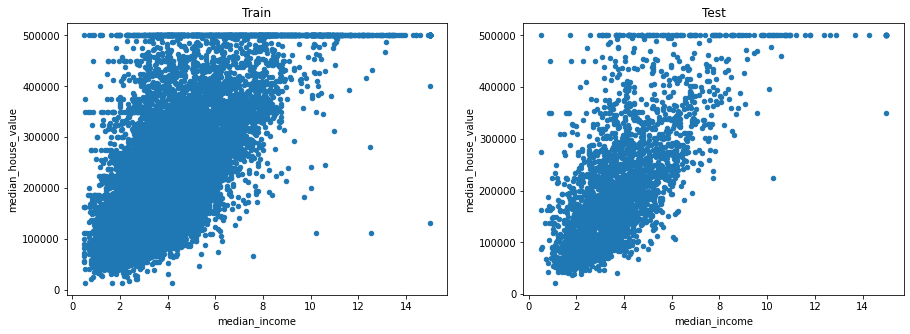

In [64]:
fig, axes = plt.subplots(ncols =2, figsize=(15, 5))
df_train.plot(x = "median_income", y = "median_house_value", kind = "scatter", ax = axes[0], title="Train")
df_test.plot(x = "median_income", y = "median_house_value", kind = "scatter", ax = axes[1], title="Test")
plt.show()

### 6. Split california_housing_train into training and validation set
Set seed: 42 and validation size 10%
### What does the “seed” part do here?
The seed() method is used to initialize the random number generator.

The random number generator needs a number to start with (a seed value), to be able to generate a random number.

If you use the same seed value twice you will get the same random number twice.

In [80]:
y = df_train["median_house_value"]
X = df_train.copy().drop(columns = ["median_house_value"])
X_test = df_test.copy().drop(columns = ["median_house_value"])
y_test = df_test["median_house_value"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

pandas.core.frame.DataFrame

### 7. Build a Linear Regression model on the training set to predict: 'median_house_value'.
    a) Evaluate the performance both on training and validation set. Chart actual vs predicted.
    b) Any enhancements you would suggest in this exercise?

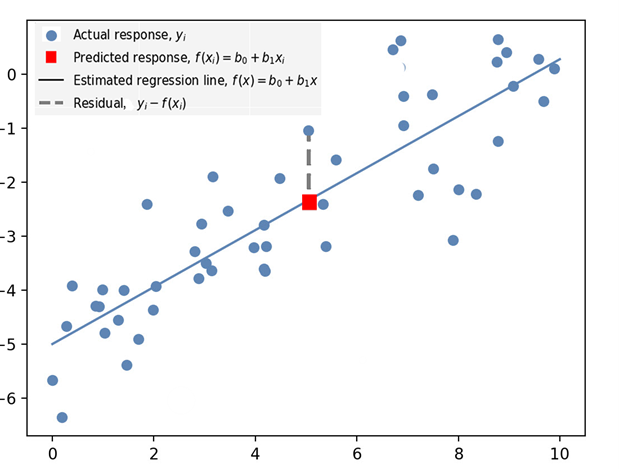

In [82]:
from IPython import display
display.Image("https://cdn.activestate.com/wp-content/uploads/2021/03/Model-linear-regressions-figure.png")

In [83]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train) 
# A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.
# score = ((y_true - y_true.mean()) ** 2).sum()

0.640917421790995

In [85]:
y_predict = reg.predict(X_val)
reg.score(X_val, y_val)

0.6439876824880013

In [86]:

reg.score(X_test, y_test)

0.6196331568497497

### 8. List some differences between supervised and unsupervised learning and give an example of each type

### 9. You are provided with two tables. Write a SQL query that lists down all the orders with customer information
“Order table” and “Customer table”

Order table has fields : OrderID, CustID, OrderNumber, Amount

Customer table has fields : ID, FirstName,LastName,City

    SELECT O.OrderID, O.CustID, O.OrderNumber, O.Amount, C.FirstName, C.LastName, C.City
        FROM Order AS O
        LEFT JOIN Customer AS C 
        ON C.ID = O.CustID
        ORDER BY OrderID ASC;

### 10. How would you deal with unbalanced binary classification?